# IS590DV Final Project Part1 - Billionaires

1. What is the "name" of the dataset? Who is the author?
    - Dataset Name: Billionaires CSV Library
    - Author: Ryan Whitcomb
2. What is the name of the place you found it?
    - CORGIS Datasets Project (https://think.cs.vt.edu/corgis/)
3. Where can we obtain it? (i.e., website URL)
    - URL 1: https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html
    - URL 2: https://piie.com/publications/working-papers/origins-superrich-billionaire-characteristics-database?ResearchID=2917
4. What is the license of the dataset? What are you allowed to do with it?
    - PublicDomain - intended for public access and use.
5. How big is it in file size and in number of items?
    - File size: 476KB
    - Number of records: 2614

In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('billionaires.csv', na_values = {'region': 0})

In [9]:
df.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


In [10]:
# check the data types of all columns.
df.dtypes

age                    int64
category              object
citizenship           object
company.name          object
company.type          object
country code          object
founded                int64
from emerging           bool
gdp                  float64
gender                object
industry              object
inherited               bool
name                  object
rank                   int64
region                object
relationship          object
sector                object
was founder             bool
was political           bool
wealth.type           object
worth in billions    float64
year                   int64
dtype: object

In [11]:
# get the number of rows of this dataset.
len(df)

2614

In [12]:
# Since the whole dataset is about miscellaneous aspects of information of these billionaires and their companies. We first look into
# the market value attribute.
df['worth in billions'].describe()

count    2614.000000
mean        3.531943
std         5.088813
min         1.000000
25%         1.400000
50%         2.000000
75%         3.500000
max        76.000000
Name: worth in billions, dtype: float64

In [13]:
# set a variable to store the data
stat_1 = df['worth in billions']

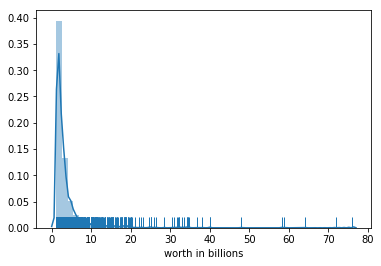

In [14]:
diag1_1 = sns.distplot(stat_1, rug=True)

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


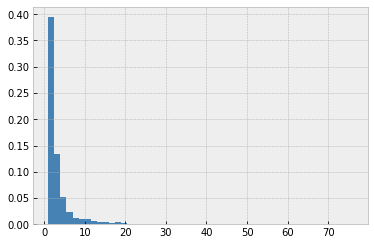

In [15]:
plt.style.use('bmh')
diag1_2 = plt.hist(stat_1, bins=50, color='steelblue', normed=True)

**We can see from the data analysis above and these two diagrams that the distribution of wealth, even among billionaires, is also highly skewed: 75% of these billionaires possess a property worth less than 3.5 billion, while the maximum value of this attribute is 76 billion.**    
**We will then look into the wealth distribution on other attributes:**


In [16]:
# First, we check the distribution on regions:
df.groupby('region')['worth in billions'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
East Asia,535.0,2.919813,3.070480,1.0,1.3,1.90,3.100,31.0
Europe,698.0,3.799427,4.723475,1.0,1.4,2.30,4.000,64.0
Latin America,182.0,3.165385,5.959908,1.0,1.3,1.75,2.875,72.0
Middle East/North Africa,117.0,2.731624,2.917446,1.0,1.3,1.90,3.000,20.4
North America,992.0,3.852218,6.172833,1.0,1.4,2.05,3.425,76.0
South Asia,69.0,3.204348,3.645038,1.0,1.4,1.80,3.200,18.6
Sub-Saharan Africa,20.0,3.905000,5.312099,1.0,1.3,2.50,3.900,25.0


In [17]:
stat_2 = df.groupby('region')['worth in billions'].describe()

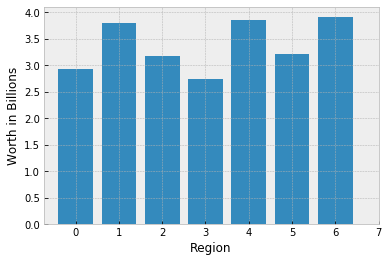

In [18]:
# Try histogram visualization on mean value:
plt.bar(range(7), stat_2["mean"])
plt.xticks(np.linspace(0,7,8))
plt.xlabel("Region")
plt.ylabel("Worth in Billions")
plt.style.use('bmh')
plt.show()

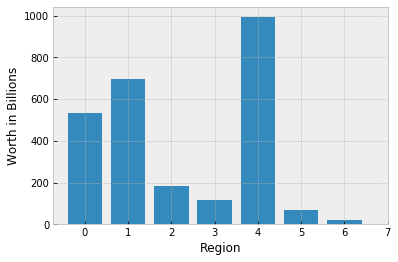

In [19]:
# Try histogram visualization on numbers of billionaires:
plt.bar(range(7), stat_2["count"])
plt.xticks(np.linspace(0,7,8))
plt.xlabel("Region")
plt.ylabel("Worth in Billions")
plt.style.use('bmh')
plt.show()

In [20]:
# Then let's see the wealth distribution on gender.
# Actually, the distribution of gender among billionaires is an interesting subject itself:
df['gender'].value_counts()

male              2328
female             249
married couple       3
Name: gender, dtype: int64

In [21]:
# Then we take a look at this distribution.
df.groupby('gender')['worth in billions'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,249.0,3.819277,5.046177,1.0,1.4,2.1,3.70,36.7
male,2328.0,3.516881,5.123194,1.0,1.4,2.0,3.40,76.0
married couple,3.0,1.300000,0.264575,1.0,1.2,1.4,1.45,1.5


In [22]:
stat_3 = df.groupby('gender')['worth in billions'].describe()

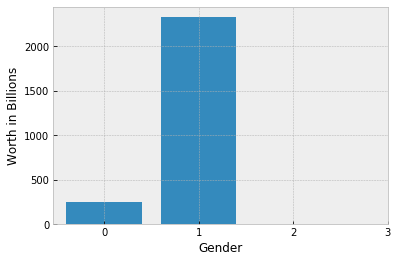

In [23]:
# Try histogram visualization on numbers of billionaires:
plt.bar(range(3), stat_3["count"])
plt.xticks(np.linspace(0,3,4))
plt.xlabel("Gender")
plt.ylabel("Worth in Billions")
plt.style.use('bmh')
plt.show()

In [24]:
df['wealth.type'].describe()

count          2592
unique            5
top       inherited
freq            953
Name: wealth.type, dtype: object

In [25]:
df['wealth.type'].value_counts()

inherited                   953
founder non-finance         713
self-made finance           500
privatized and resources    236
executive                   190
Name: wealth.type, dtype: int64

In [26]:
df.groupby('wealth.type')['worth in billions'].describe()

,count,mean,std,min,25%,50%,75%,max
wealth.type,,,,,,,,
executive,190.0,2.644211,3.341869,1.0,1.2,1.7,2.575,26.5
founder non-finance,713.0,3.786396,6.545012,1.0,1.4,2.0,3.500,76.0
inherited,953.0,3.737566,4.512107,1.0,1.5,2.3,4.000,40.0
privatized and resources,236.0,3.756780,5.909206,1.0,1.4,1.9,3.325,72.0
self-made finance,500.0,3.091400,3.753271,1.0,1.3,1.9,3.100,38.0


In [27]:
stat_4 = df.groupby('wealth.type')['worth in billions'].describe()

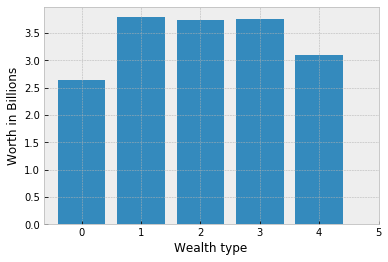

In [28]:
# Try histogram visualization on mean value:
plt.bar(range(5), stat_4["mean"])
plt.xticks(np.linspace(0,5,6))
plt.xlabel("Wealth type")
plt.ylabel("Worth in Billions")
plt.style.use('bmh')
plt.show()

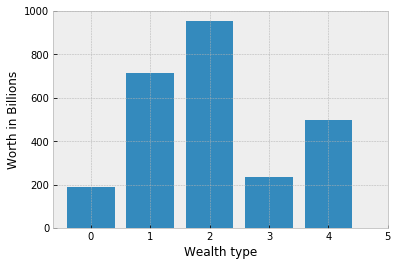

In [29]:
# Try histogram visualization on numbers of billionaires:
plt.bar(range(5), stat_4["count"])
plt.xticks(np.linspace(0,5,6))
plt.xlabel("Wealth type")
plt.ylabel("Worth in Billions")
plt.style.use('bmh')
plt.show()